In [316]:
#Import all the stuff here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy import mean
from scipy import stats
from statsmodels.multivariate.manova import MANOVA
from datetime import datetime

In [40]:
crafts = pd.read_json('data/Arts_Crafts_and_Sewing_5.json', lines=True)
music = pd.read_json('data/Digital_Music_5.json', lines=True)
tools = pd.read_json('data/Industrial_and_Scientific_5.json', lines=True)
beauty = pd.read_json('data/Luxury_Beauty_5.json', lines=True)
instruments = pd.read_json('data/Musical_Instruments_5.json', lines=True)
pantry = pd.read_json('data/Prime_Pantry_5.json', lines=True)
software = pd.read_json('data/Software_5.json', lines=True)
games = pd.read_json('data/Video_Games_5.json', lines=True)

In [41]:
#Remove the columns that Im sure I will not need to concern myself with

#crafts = crafts.drop(['reviewerID', 'style', 'reviewerName', 'image'], axis = 1)
#music = music.drop(['reviewerID', 'style', 'reviewerName', 'image'], axis = 1)
#tools = tools.drop(['reviewerID', 'style', 'reviewerName', 'image'], axis = 1)
#beauty = beauty.drop(['reviewerID', 'style', 'reviewerName', 'image'], axis = 1)
removeThis = ['reviewerID', 'style', 'reviewerName', 'image']
#instruments = instruments.drop(removeThis, axis = 1)
#pantry = pantry.drop(removeThis, axis = 1)
#software = software.drop(removeThis, axis = 1)
#games = games.drop(removeThis, axis = 1)

In [42]:
print(list(crafts.columns))
print(list(music.columns))
print(list(tools.columns))
print(list(beauty.columns))
print(list(instruments.columns))
print(list(pantry.columns))
print(list(software.columns))
print(list(games.columns))

#That dont look right...

['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'vote', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']


In [43]:
#moveVotes = music.vote
#music = music.drop('vote', axis=1)
#music.append(moveVotes)
columns = music.columns.tolist()
columns.remove('vote')
columns.append('vote')
music = music[columns]

print(list(crafts.columns))
print(list(music.columns))
print(list(tools.columns))
print(list(beauty.columns))
print(list(instruments.columns))
print(list(pantry.columns))
print(list(software.columns))
print(list(games.columns))

#Now thats more like it!

['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']


In [47]:
reviews = pd.concat([crafts, music, tools, beauty, instruments, pantry, games, software]).reset_index()
reviews = reviews.drop('index', axis = 1)
reviews

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote
0,4,True,"03 29, 2016",0449819906,Contains some interesting stitches.,Four Stars,1459209600,NaN
1,5,True,"08 12, 2015",0449819906,I'm a fairly experienced knitter of the one-co...,My current favorite go-to guide for inspiration,1439337600,18
2,4,True,"04 5, 2015",0449819906,Great book but the index is terrible. Had to w...,"lots of great examples, good instructions, col...",1428192000,3
3,5,True,"10 11, 2014",0449819906,I purchased the Kindle edition which is incred...,Another little gem by Melissa Leapman,1412985600,NaN
4,5,True,"05 8, 2014",0449819906,Very well laid out and very easy to read.\n\nT...,Very comprehensive,1399507200,NaN
...,...,...,...,...,...,...,...,...
1655172,4,False,"07 16, 2016",B01FFVDY9M,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN
1655173,3,False,"06 17, 2017",B01HAP3NUG,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN
1655174,4,False,"01 24, 2017",B01HAP3NUG,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN
1655175,3,False,"06 14, 2018",B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN


In [4]:
reviews.to_csv('data/reviews.csv')

In [145]:
pref = 'data/meta_'
m_crafts = pd.read_json(pref+'Arts_Crafts_and_Sewing.json', lines=True)
m_music = pd.read_json(pref+'Digital_Music.json', lines=True)
m_tools = pd.read_json(pref+'Industrial_and_Scientific.json', lines=True)
m_beauty = pd.read_json(pref+'Luxury_Beauty.json', lines=True)
m_instruments = pd.read_json(pref+'Musical_Instruments.json', lines=True)
m_pantry = pd.read_json(pref+'Prime_Pantry.json', lines=True)
m_software = pd.read_json(pref+'Software.json', lines=True)
m_games = pd.read_json(pref+'Video_Games.json', lines=True)

In [173]:
'''
print(list(m_crafts.columns))
print(list(m_music.columns))
print(list(m_tools.columns))
print(list(m_beauty.columns))
print(list(m_instruments.columns))
print(list(m_pantry.columns))
print(list(m_software.columns))
print(list(m_games.columns))
'''
m_crafts
#list(m_crafts[m_crafts.tech1 != '']['tech1'])[0]
removeThis = ['category', 'tech1', 'fit', 'also_buy', 'image', 'tech2', 'feature', 'rank', 'also_view', 'details', 
              'main_cat', 'similar_item', 'date']
#m_crafts = m_crafts.drop(removeThis, axis = 1)
#m_music = m_music.drop(removeThis, axis = 1)
#m_tools = m_tools.drop(removeThis, axis = 1)
#m_beauty = m_beauty.drop(removeThis, axis = 1)
#m_instruments = m_instruments.drop(removeThis, axis = 1)
#m_pantry = m_pantry.drop(removeThis, axis = 1)
#m_software = m_software.drop(removeThis, axis = 1)
#m_games = m_games.drop(removeThis, axis = 1)

print(list(m_crafts.columns))
print(list(m_music.columns))
print(list(m_tools.columns))
print(list(m_beauty.columns))
print(list(m_instruments.columns))
print(list(m_pantry.columns))
print(list(m_software.columns))
print(list(m_games.columns))

['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']


In [188]:
products = pd.concat([m_crafts, m_music, m_tools, m_beauty, m_instruments, m_pantry, m_software, m_games]).reset_index()
products = products.drop_duplicates(subset=['asin']).reset_index()
#products[products.asin == products.shift().asin]
products = products.drop(['level_0', 'index'], axis = 1)

In [218]:
print("With valid prices: ", len(products[products['price'].str.startswith('$')]), " out of ", len(products))
#This may be a problem...
test = products[~products['price'].str.startswith('$')]
aprice = list(test[test['price'] != ''].price)[0]
'$' in aprice
# Maybe ill stray away from pricing since the data seems so poor

With valid prices:  430181  out of  762688


False

In [219]:
products.to_csv('data/products.csv')

In [2]:
products = pd.read_csv('data/products.csv')

In [107]:
reviews = pd.read_csv('data/reviews.csv', low_memory=False)

In [50]:
#Have to go save them without the index ugh
#reviews = reviews.drop(['Unnamed: 0'], axis=1)
#reviews = reviews.drop(['index'], axis=1)
#reviews.drop(reviews.columns[1], axis=1)
reviews.to_csv('data/reviews.csv', index = False)

In [61]:
#reviews
#products = products.drop(['Unnamed: 0'], 1)
products.to_csv('data/products.csv', index=False)

In [62]:
products = pd.read_csv('data/products.csv')
products
# much better

,description,title,brand,price,asin
0,['The patch features the sweaty masculine hand...,You Son of a Bitch! 1987 Embroidered Patch,Honchosfx,$6.41,6665560953
1,"['With 5 packs stars folding paper, each pack ...",Origami Stars Papers Package 1H (5 packs),NaN,NaN,7000000376
2,[],Yi De Ge Chinese Calligraphy Sumi Drawing Blac...,MasterChinese,NaN,7000001089
3,[],"10 pcs/Lot GITD Skeleton Skull ,Knife/ Flashli...",Skull Beads N02.,NaN,7107269291
4,[],Pinkie Tm girl flower Handmade soap silicone m...,NaN,$35.00,7121277158
...,...,...,...,...,...
762683,['<div>The Force is strong with this one The N...,Lego Star Wars: The Force Awakens - PS Vita [D...,by\n \n Warner Bros.,NaN,B01HJ1521Y
762684,"[""<div>The Season Pass includes three Level Pa...",Lego Star Wars: The Force Awakens Season Pass...,by\n \n Warner Bros.,\n\t\t ...,B01HJ14TTA
762685,"[""<div>The Technomancer takes you to Mars, whe...",The Technomancer - PS4 [Digital Code],by\n \n Focus Home Interactive,NaN,B01HJ14OT0
762686,['<b>FUNCTIONS:</b><br> 1.Take apart your Xbox...,"Repair T8 T6 Tools for XBOX One Xbox 360, YTTL...",by\n \n YTTL,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",B01HJC33WS


All of the steps above to create the datafiles yourself. You can also access the complete csv files directly [here](https://drive.google.com/drive/folders/14HSh9GaeTKt1w_ulUqDAYZ-gUOnBdWB-?usp=sharing)

### Problem
Amazon.com is the worlds largest online retailer.<sup>5</sup> Many people rely on product reviews before purchasing products, however there has been discussion over the validity of product reviews on Amazon.com. There have been reports of inaccurate reviews on Amazon.com, where false positive reviews are submitted or false upvotes on negative reviews have been cast. This analysis aims to consider these claims of deceptive reviews in the Amazon marketplace and look for various trends within Amazon product review data. 

### Problem Justification
Amazon.com is a household name that dominates the e-commerce space. Many users of Amazon's online shopping services rely on customer reviews on products that they are interested in. In fact, 20% of sales on Amazon.com are attributed to product reviews. Additionally, 1 out of 3 shoppers say that they will not purchase a product unless it has been positively reviewed.<sup>1</sup> <br><br>
However, these reviews are not always honest reviews from paying customers with real opinions. There are numerous instances of fake reviews and ratings on Amazon.com, which portray a false image of a product to the audience. One example may be the use of bots and workers at click farms to mark negative reviews on their competitors products as "helpful" in order to give those products a false portrayal of bad customer experiences.<sup>2</sup> This approach aims to turn customers away from similar products of a companies competitors in the hopes that those customers will purchase their product instead. 
<br><br>Another example that may give false positive portrayal is the fact that some sellers on Amazon pay others to leave good reviews on their Amazon products. This process is called "astroturfing". Astroturfing is defined as, "creating the impression of public support by paying people in the public to pretend to be supportive".<sup>6</sup> During this process, there are monetary incentives offered to those who submit a positive review on that sellers product, which results in numerous inaccurate and positive reviews on undeserving products. One particular study has found 23 Facebook groups that are solely a dedicated place for sellers to hire fake reviewers for their products. On average, these groups include about 16,000 members and 570 posts per day.<sup>3</sup> 
<br><br> These deceitful techniques by sellers to attempt to gain more business hurt those sellers who are trying to honestly compete in the Amazon e-commerce space. These tactics of covering up the truth about products not only hurt honest sellers by decreasing their sales, but there also negatively impact consumers. If customers purchase products based off of inaccurate product reviews, the product they receive may be of lesser quality of competing products. At this point, customers are buying goods based off of deceptive lies rather that truthful product descriptions. With so much reported corruption within the reviews section of Amazon.com, it may be helpful to analyze the data withing these reviews to potentially identify patterns within the data. 

### Research Questions (subject to change)
###### Likely to make one based off of basic preliminary data exploration, maybe using a histogram of something
- (Added later) How is are the star-ratings of products distributed?
- Is there a relationship between how positive or negative a review is and how objective or subjective a review is?
- Does there appear to be a pattern across the time of **day** or **year** the review was posted? (this spans either 24 hours or 365 days... same time on different days have same x value)
- Are there any inconsistancies in the spread of number of reviews across time relative to a products initial posting? (this is time as a whole)

### Question Justification
- Add justification here
- By finding patterns between the level of objectivity and positivity ratings of a product review, we may be able to identify groups of reviews with different types. This can be done by observing the "sentiment" of reviews. The sentiment of a review can tell you two important characteristics of the speech used: the polarity (positive/negative tone behind the speech) and the subjectivity (how opinionated vs factual the speech is). <sup>7</sup> Prevalence of different groups representing different types of reviews may serve as an interesting basis for further questions of what could explain the groupings.  <br><br>
- Sharp spikes in a graph showing the number of reviews posted across time in a day and time in a year may seem unusual, especially for certain times in the day. For example, if there were many upvotes for a negative review late in the night, there should be some concern. It is unlikely that many legitimate reviewers submit reviews and ratings very late at night. Therefore, unusual peaks may be helpful in determining how accuarate reviews are.<br><br>  
- A good indication of a fake review is said to be a short spurt of many similar reviews. <sup>4</sup> This is because many fake reviewers may respond to a single advertisement, promising compensation for good reviews, soon after the ad is posted, when the ad is at the top of the list of ads. The similarity of sentiment between these reviews that have been posted close to each other can also serve as a good indication of whether or not the suspected reviews are fake.   

### Datasets
The final dataset is composed of data that comes from numerous json files. There is no specific reason or meaning behind the categories chosen. The specific product categories analyzed include: 
- Arts, Crafts, and Sewing
- Digital Music
- Industrial and Scientific
- Luxury and Beauty
- Musical Instruments
- Amazon Prime Pantry
- Software
- Video Games<br>

The "products" csv file is a combination of [**json files**](http://deepyeti.ucsd.edu/jianmo/amazon/index.html) that describe general info about each Amazon product, such as title, brand, and ID number. <br>

The "reviews" csv file is a combination of [**json files**](https://nijianmo.github.io/amazon/index.html#complete-data) that provide information, such as time, product ID, and review text, for the provided Amazon products. 

#### NOW the fun part

In [108]:
pid = products['asin'].nunique()
rid = reviews['asin'].nunique()
print("Total ids in review table: ", rid)
print("Total ids in product table: ", pid)
print("There are many more metadata entries than there are for products reviewed which is good\n")
#reviews['asin']
#products['asin']
#products[list(reviews['asin'])]

test = reviews['asin'].isin(list(products['asin']))
print("Total reviews entries: ", len(test))
print("Products reviewed with product metadata: ", len(test[test == True]))
print( len(test) - len(test[test == True]) , "entries do not have metadata provided, so we should remove them")
#Each review will have a product metadata... good

Total ids in review table:  75443
Total ids in product table:  762688
There are many more metadata entries than there are for products reviewed which is good

Total reviews entries:  1655177
Products reviewed with product metadata:  1484200
170977 entries do not have metadata provided, so we should remove them


In [94]:
#reviews['asin'].count()
reviews

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote
0,4,True,"03 29, 2016",0449819906,Contains some interesting stitches.,Four Stars,1459209600,NaN
1,5,True,"08 12, 2015",0449819906,I'm a fairly experienced knitter of the one-co...,My current favorite go-to guide for inspiration,1439337600,18
2,4,True,"04 5, 2015",0449819906,Great book but the index is terrible. Had to w...,"lots of great examples, good instructions, col...",1428192000,3
3,5,True,"10 11, 2014",0449819906,I purchased the Kindle edition which is incred...,Another little gem by Melissa Leapman,1412985600,NaN
4,5,True,"05 8, 2014",0449819906,Very well laid out and very easy to read.\n\nT...,Very comprehensive,1399507200,NaN
...,...,...,...,...,...,...,...,...
1655172,4,False,"07 16, 2016",B01FFVDY9M,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN
1655173,3,False,"06 17, 2017",B01HAP3NUG,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN
1655174,4,False,"01 24, 2017",B01HAP3NUG,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN
1655175,3,False,"06 14, 2018",B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN


In [109]:
#products['asin'][test == False]
#8862933177 in products['asin']
#products['asin'][products['asin'] == 8862933177]
#products.head(30)

#Every review id that has product metadata
includes = list(reviews['asin'][test == True].unique())
includes[0:10]

['8862933177',
 '9578232225',
 '9628676717',
 '9974314372',
 'B00000J3LY',
 'B0000205X0',
 'B0000222ZA',
 'B00002N6GB',
 'B00002X2FX',
 'B0000302YM']

In [110]:
reviews = reviews[reviews['asin'].isin(includes)]
reviews = reviews.reset_index(drop = True)
#reviews = reviews.drop(['index'], 1)
reviews

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote
0,5,True,"02 25, 2010",8862933177,I purchased this Recipe Journal for a friend w...,Cool place to Catalog Your Recipes,1267056000,5
1,5,True,"02 15, 2017",8862933177,I bought this to have my daughter's grandmothe...,It seems like it'll work good for the purpose,1487116800,NaN
2,5,True,"01 19, 2017",8862933177,Bought as a gift for my mom...she loves it!,Great recipe book,1484784000,NaN
3,5,True,"02 18, 2016",8862933177,I love this journal i am able to write up my f...,Love it.,1455753600,NaN
4,5,True,"11 12, 2014",8862933177,Love this journal. I keep recipes on loose pa...,Love this journal,1415750400,NaN
...,...,...,...,...,...,...,...,...
1484195,4,False,"07 16, 2016",B01FFVDY9M,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN
1484196,3,False,"06 17, 2017",B01HAP3NUG,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN
1484197,4,False,"01 24, 2017",B01HAP3NUG,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN
1484198,3,False,"06 14, 2018",B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN


#### Create research question from existing data... how about overall ratings?

In [1]:
stars = list(reviews['overall'])
#print([1/len(stars) for _ in stars])
sns.histplot(stars, bins = [.5,1.5,2.5,3.5,4.5,5.5], stat="probability", color='mediumturquoise')
plt.title("Frequency of product ratings on a 1-5 scale")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
print("Percentage of 5-star reviews: ", round(reviews['overall'][reviews['overall'] == 5].count()/len(reviews),2))
pd.Series(stars).describe().apply(lambda x: round(x, 2))

NameError: name 'reviews' is not defined

## Tried to run after reloading file... graph can be found in final ipynb

We can use this information to answer our first question. The distribution of star-ratings of products from our sample on Amazon is left skewed. It appears as though about 69% of the almost 1.5 million reviews have awarded a product a 5-star rating. The average rating a product has received is 4.42 stars which is a rather high rating. 

In [218]:
# Just playing around here
text = TextBlob("The sky is blue")
text.sentiment.subjectivity

0.1

In [111]:
#TextBlob(reviews['reviewText'][0]).sentiment
blobs = reviews['reviewText'].apply(lambda x: TextBlob(str(x)))
pol = []
sub = []
blobs.apply(lambda x: pol.append(x.sentiment.polarity))
blobs.apply(lambda x: sub.append(x.sentiment.subjectivity))

0          None
1          None
2          None
3          None
4          None
           ... 
1484195    None
1484196    None
1484197    None
1484198    None
1484199    None
Name: reviewText, Length: 1484200, dtype: object

In [115]:
reviews['polarity'] = pol
reviews['subjectivity'] = sub
reviews

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote,polarity,subjectivity
0,5,True,"02 25, 2010",8862933177,I purchased this Recipe Journal for a friend w...,Cool place to Catalog Your Recipes,1267056000,5,0.637245,0.740816
1,5,True,"02 15, 2017",8862933177,I bought this to have my daughter's grandmothe...,It seems like it'll work good for the purpose,1487116800,NaN,0.197073,0.429415
2,5,True,"01 19, 2017",8862933177,Bought as a gift for my mom...she loves it!,Great recipe book,1484784000,NaN,0.000000,0.000000
3,5,True,"02 18, 2016",8862933177,I love this journal i am able to write up my f...,Love it.,1455753600,NaN,0.262500,0.565000
4,5,True,"11 12, 2014",8862933177,Love this journal. I keep recipes on loose pa...,Love this journal,1415750400,NaN,0.211538,0.434615
...,...,...,...,...,...,...,...,...,...,...
1484195,4,False,"07 16, 2016",B01FFVDY9M,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN,0.084900,0.441763
1484196,3,False,"06 17, 2017",B01HAP3NUG,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN,0.289231,0.548156
1484197,4,False,"01 24, 2017",B01HAP3NUG,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN,0.189735,0.526061
1484198,3,False,"06 14, 2018",B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN,-0.009615,0.591026


### Let's exlpore our data a little bit

In [262]:
most_pos = reviews[reviews['polarity'] == reviews['polarity'].max()]
asin = list(most_pos['asin'])[0]
prod = list(products[products['asin'] == asin]['title'])[0]
brand = list(products[products['asin'] == asin]['brand'])[0]
print('Product: ', prod, '\n')
print('Brand: ', brand, '\n')
print("Review: ", list(most_pos['reviewText'])[0], '\n')
print('Polarity rating: ', round(list(most_pos['polarity'])[0], 4), '\n')

Product:  LyxPro Balanced XLR Cable 3 ft Premium Series Professional Microphone Cable, Powered Speakers and Other Pro Devices Cable, Black 

Brand:  LyxPro 

Review:  Excellent product, very fast delivery !! Five Stars !!!! 

Polarity rating:  0.9959 



We just found the product that has a review scoring the highest polarity rating, which makes sense after looking at its great review. What does the most objective review look like? 

In [261]:
most_obj = reviews[reviews['subjectivity'] == reviews['subjectivity'].min()]
asin = list(most_obj['asin'])[0]
prod = list(products[products['asin'] == asin]['title'])[0]
brand = list(products[products['asin'] == asin]['brand'])[0]
print('Product: ', prod, '\n')
print('Brand: ', brand, '\n')
print("Review: ", list(most_obj['reviewText'])[0], '\n')
print('Subjectivity rating: ', round(list(most_obj['subjectivity'])[0], 4), '\n')

Product:  Logitech G502 Proteus Spectrum RGB Tunable Gaming Mouse, 12,000 DPI On-The-Fly DPI Shifting, Personalized Weight and Balance Tuning with (5) 3.6g Weights, 11 Programmable Buttons 

Brand:  Logitech 

Review:  In Windows 10, the Logitech driver hasn't been digitally signed by Microsoft yet, therefore it creates an alert flag in the Device Manager under the  name... Logitech Gaming Virtual Bus Enumerator.  This is caused when memory integrity checking setting is turned on in the Core Isolation section of Device Security.  It causes a severe issue where my computer stopped responding and I had to manually restart it several times.  To correct the problem, turn off memory integrity and the issue resolved. The error message displayed in Device Manager is: "Windows cannot load the device driver for this hardware. The driver may be corrupted or missing. (Code 39)."
Driver details... Driver Name: oem27.inf,  Provider: Logitech, Date: 6/13/16, Version: 8.85.75.0, Digital Signer: Micro

This is interesting too. By finding the review with the loweset subjectivity rating, we were able to find which product had the most objective review. After reading the review for ourselves, it makes sense because of how descriptive and factual the review is. 

In [116]:
reviews.to_csv("with_sent.csv")

In [133]:
reviews = pd.read_csv("with_sent.csv", low_memory=False)
temp = reviews[reviews['polarity'] > -1]
reviews = temp[temp['polarity'] < 1]
temp = reviews[reviews['subjectivity'] > 0]
reviews = temp[temp['subjectivity'] < 1]
reviews['polarity'].max()

0.99591064453125

In [275]:
a = reviews['reviewText'][2]
a = "I bought this as a gift She hates it"
a = "kill me"
TextBlob("I bought this as a gift She hates it").sentiment
# Just playing around... whyre they 0.0 lol

Sentiment(polarity=0.0, subjectivity=0.0)

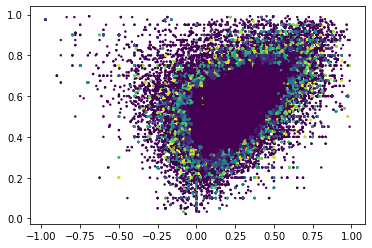

In [134]:
model = DBSCAN(.005)
model.fit(reviews[['polarity', 'subjectivity']][0:100000])
plt.scatter(reviews['polarity'][0:100000], reviews['subjectivity'][0:100000], s=2, c=model.labels_)#, alpha=.05)
plt.show()

Theres no recognizeable groups within the data, so clustering may not be the best choice. 

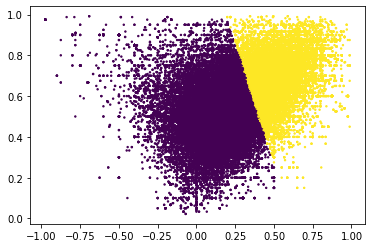

In [135]:
model = KMeans(2, random_state=0)
model.fit(reviews[['polarity', 'subjectivity']][0:100000])
plt.scatter(reviews['polarity'][0:100000], reviews['subjectivity'][0:100000], s=2, c=model.labels_)#, alpha=.05)
plt.show()

Not surprising that KMeans didn't give good clusters either... lets ditch the clustering and just test the correlation of the scatterplot

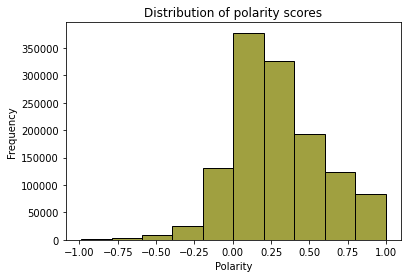

p-value:  0.0


C:\Users\cplum\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [150]:
#(reviews['polarity'] > 0 and reviews['polarity'] < 1).all()
sns.histplot(reviews['polarity'], bins=10, color='olive')
plt.title("Distribution of polarity scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

test_stat, p_val = stats.shapiro([reviews['polarity']])
print("p-value: ", str(p_val))

Our p-value is 0.0, which may be inaccurate because of how much data we have. Our data looks approximately normal, and we have over 1 million datapoints, so we may be able to use parametric statistical tests if the subjectivity scores tell a similar story.

### **Dont use the QQ plots**

((array([-4.87437312, -4.69627059, -4.60002947, ...,  4.60002947,
          4.69627059,  4.87437312]),
  array([-0.98828125, -0.9875    , -0.9875    , ...,  0.9921875 ,
          0.99375   ,  0.99591064])),
 (0.2742153114458207, 0.2871645737044671, 0.9916212995099097))

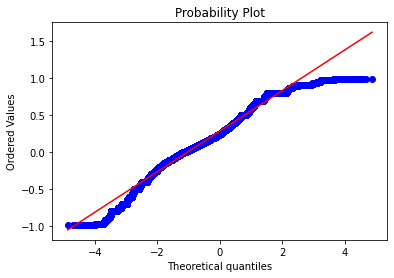

In [149]:
stats.probplot(reviews['polarity'], dist="norm", plot=plt)

This plot also shows that our data is close to normal. Since we have so much data, we will be able to use parametric statistical tests

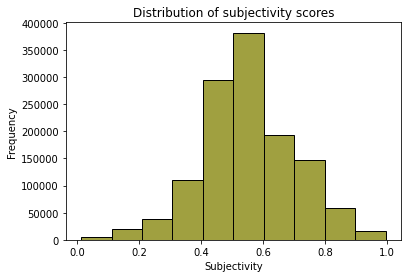

p-value:  0.0


C:\Users\cplum\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [151]:
sns.histplot(reviews['subjectivity'], bins=10, color='olive')
plt.title("Distribution of subjectivity scores")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

test_stat, p_val = stats.shapiro([reviews['subjectivity']])
print("p-value: ", str(p_val))

Again, our p-value is 0.0, which may be inaccurate because of how much data we have. Our data looks approximately normal, and we have over 1 million datapoints, so we sill use parametric statistical tests. 

((array([-4.87437312, -4.69627059, -4.60002947, ...,  4.60002947,
          4.69627059,  4.87437312]),
  array([0.0125    , 0.01666667, 0.01666667, ..., 0.99166667, 0.99375   ,
         0.995     ])),
 (0.1488357712134399, 0.5583667172470453, 0.9964620157852726))

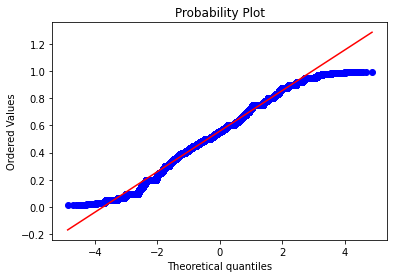

In [152]:
stats.probplot(reviews['subjectivity'], dist="norm", plot=plt)

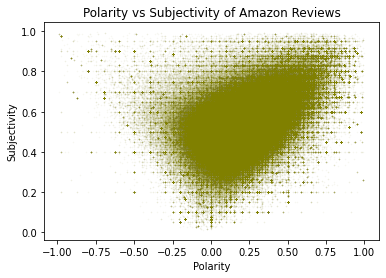

In [167]:
plt.scatter(x=reviews['polarity'], y=reviews['subjectivity'], s=.3, alpha=.05, color='olive')
plt.title("Polarity vs Subjectivity of Amazon Reviews")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

## **Another Research Question: Does there seem to be a relationship between the polarity and subjectivity of an Amazon product review?**

Upon glancing at the data, it appears as though there is a positive correlation between polarity and subjectivity of a review. Let's perform a statistical test to explore this farther. 

In [168]:
#Finding Spearman Correlation Coefficient
corr, p_value = stats.spearmanr(reviews['polarity'], reviews['subjectivity'])
print(round(corr,2), " : " , p_value)

0.53  :  0.0


The Spearman Correlation Coefficient is .53, showing a moderate (approaching strong) monotonic relationship between the polarity and subjectivity of an Amazon product review. The p-value is extremely small, thus it is very unlikely that a correlation coefficient produced would be this strong if there was no correlation between polarity and subjectivity.

This suggests that, in general, Amazon reviews with higher polarity ratings also have higher subjectivity ratings. In more coloquial terms, reviews that are more positive in nature tend to also be more opinionated. However, even though we did find this general trend in the data, an interesting attribute of the scatterplot is how a "V" shape is created, where the points is at a polarity of 0. In other words, the more emotional a review is (either positive or negative), the more opinionated it tends to be. 

### **Another question added: Is there a difference in speech between verified and unverified reviews?

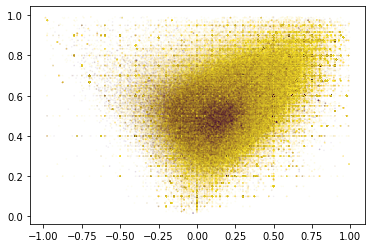

In [170]:
plt.scatter(reviews['polarity'], reviews['subjectivity'], s=.5, alpha=.05, c=reviews['verified'])
#plt.plot(np.mean(reviews['polarity'][reviews['verified'] == True]), np.mean(reviews['subjectivity'][reviews['verified'] == True]), 'bo')
#plt.plot(np.mean(reviews['polarity'][reviews['verified'] == False]), np.mean(reviews['subjectivity'][reviews['verified'] == False]), 'ro')
plt.show()

Looking at the scatterplot color coded by verified status, it seems that there may be a difference between the two groups of data. Let's plot the two groups separately and compare again. 

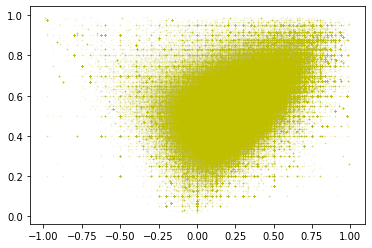

In [180]:
plt.scatter(reviews['polarity'][reviews['verified'] == True], reviews['subjectivity'][reviews['verified'] == True], s=.5, alpha=.05, color='y')
#plt.plot(np.mean(reviews['polarity'][reviews['verified'] == True]), np.mean(reviews['subjectivity'][reviews['verified'] == True]), 'ro')
plt.show()

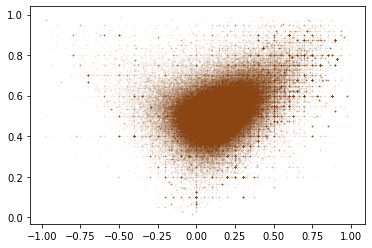

In [184]:
plt.scatter(reviews['polarity'][reviews['verified'] == False], reviews['subjectivity'][reviews['verified'] == False], s=.5, alpha=.05, color='saddlebrown')
#plt.plot(np.mean(reviews['polarity'][reviews['verified'] == False]), np.mean(reviews['subjectivity'][reviews['verified'] == False]), 'ro')
plt.show()

In [176]:
np.std(reviews['polarity'][reviews['verified'] == False])/np.std(reviews['polarity'][reviews['verified'] == True])
np.std(reviews['subjectivity'][reviews['verified'] == False])/np.std(reviews['subjectivity'][reviews['verified'] == True])

0.7186673006057978

After looking at the separate plots, verified and unverified reviews look pretty similar regarding their polarity and subjectivity ratings. Let's perform a MANOVA test to test whether there is a significant difference between both groups of data regarding their polarity and subjectivity. 

In [200]:
maov = MANOVA.from_formula('polarity + subjectivity ~ verified', data=reviews)
print(maov.mv_test())

                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
       Intercept        Value  Num DF    Den DF      F Value    Pr > F
----------------------------------------------------------------------
          Wilks' lambda 0.2583 2.0000 1270026.0000 1823656.0056 0.0000
         Pillai's trace 0.7417 2.0000 1270026.0000 1823656.0056 0.0000
 Hotelling-Lawley trace 2.8718 2.0000 1270026.0000 1823656.0056 0.0000
    Roy's greatest root 2.8718 2.0000 1270026.0000 1823656.0056 0.0000
----------------------------------------------------------------------
                                                                      
----------------------------------------------------------------------
          verified        Value  Num DF    Den DF     F Value   Pr > F
----------------------------------------------------------------------
            Wilks' lambda 0.9

By looking at the far right row within the "verified" section of the table, we can find that the p-value it 0, which is less than .05. This means that we are able to reject the null hypothesis, which stated that there is no difference between the means of verified and unverified reviews. Therefore, we found that there does appear to be a statistically significant difference between the means of verified vs. unverified reviews.

In [51]:
len(reviews[reviews['verified'] == True])/(len(reviews[reviews['verified'] == False])+len(reviews[reviews['verified'] == True]))

0.8230110737401498

#### Now time for time analysis

In [206]:
reviews = reviews.drop(['Unnamed: 0'], 1)
reviews

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote,polarity,subjectivity
0,5,True,"02 25, 2010",8862933177,I purchased this Recipe Journal for a friend w...,Cool place to Catalog Your Recipes,1267056000,5,0.637245,0.740816
1,5,True,"02 15, 2017",8862933177,I bought this to have my daughter's grandmothe...,It seems like it'll work good for the purpose,1487116800,NaN,0.197073,0.429415
2,5,True,"02 18, 2016",8862933177,I love this journal i am able to write up my f...,Love it.,1455753600,NaN,0.262500,0.565000
3,5,True,"11 12, 2014",8862933177,Love this journal. I keep recipes on loose pa...,Love this journal,1415750400,NaN,0.211538,0.434615
4,4,False,"12 10, 2013",8862933177,I've been using this as my primary recipe jour...,My primary recipe journal!,1386633600,NaN,0.148639,0.407681
...,...,...,...,...,...,...,...,...,...,...
1270024,4,False,"07 16, 2016",B01FFVDY9M,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN,0.084900,0.441763
1270025,3,False,"06 17, 2017",B01HAP3NUG,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN,0.289231,0.548156
1270026,4,False,"01 24, 2017",B01HAP3NUG,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN,0.189735,0.526061
1270027,3,False,"06 14, 2018",B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN,-0.009615,0.591026


In [318]:
datenums = reviews['unixReviewTime']
for ts in datenums[0:100]:
    print(datetime.utcfromtimestamp(ts).strftime('%m'))
#Turns out we dont have time data... summer

02
02
02
11
12
05
04
03
01
08
05
05
04
05
04
04
02
01
03
02
02
02
01
01
01
12
12
11
10
08
07
04
03
01
01
11
09
07
02
01
08
01
07
06
03
04
04
12
12
12
08
05
02
09
01
01
01
08
01
10
07
06
07
09
09
07
03
10
09
04
05
07
03
05
11
10
10
08
06
01
11
09
04
03
03
02
01
12
07
03
03
01
01
11
09
09
09
06
03
03


In [2]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
times = reviews['reviewTime']
times_v = reviews['reviewTime'][reviews['verified'] == True]
times_nv = reviews['reviewTime'][reviews['verified'] == False]
#times[0].split()[0]
times = times.apply(lambda x: x.split()[0])
times_v = times_v.apply(lambda x: x.split()[0])
times_nv = times_nv.apply(lambda x: x.split()[0])
times = times.value_counts().sort_index()
times_v = times_v.value_counts().sort_index()
times_nv = times_nv.value_counts().sort_index()

'''
print(times)
print(times_v)
print(times_nv)
'''

data = pd.DataFrame()
data['Month'] = list(months)
data['total'] = list(times)
data['verified'] = list(times_v)
data['unverified'] = list(times_nv)

times = list(times.apply(lambda x: x/len(reviews)))
times_v = list(times_v.apply(lambda x: x/len(reviews[reviews['verified'] == True])))
times_nv = list(times_nv.apply(lambda x: x/len(reviews[reviews['verified'] == False])))

data2 = pd.DataFrame()
data2['total'] = times
data2['verified'] =times_v
data2['unverified'] = times_nv

sns.lineplot(data=data2)
plt.title("Number of Reviews per Month")
plt.xlabel('Month')
plt.ylabel('Number of reviews')
plt.ylim([0, .12])
plt.show()

NameError: name 'reviews' is not defined

## Tried to run after reloading file... graph can be found in final ipynb

This graph shows what proportion of reviews were posted that month across the whole year. We can see that the verified and total lines are very similar. This means that for each month, about the same proportion of verified reviews are posted as are reviews posted in general. This is less true for unverified posts. Up until May, less unverified posts are posted relative to the total number of reviews posted, however the contrary becomes true after May. 

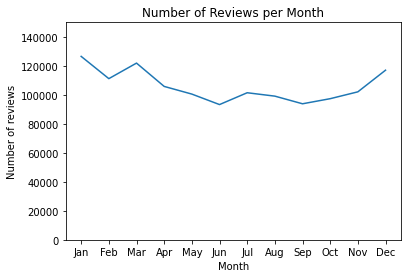

In [360]:
times = reviews['reviewTime']
times = times.apply(lambda x: x.split()[0])
times = times.value_counts().sort_index()

sns.lineplot(x = months, y = times)
plt.title("Number of Reviews per Month")
plt.xlabel('Month')
plt.ylabel('Number of reviews')
plt.ylim([0, 150000])
plt.show()
#data

The trend in data shows that Amazon reviews are not posted an even amount of time across the year. Our lineplot suggests that the majority of reviews are posted in the winter months, and the number of reviews posted per month begin to drop after this. This is an interesting aspect to start questioning. Why is this the case? Does it have to do with the holiday season and the number of products that are ordered at that time? 

### Conclusion

- How is are the star-ratings of products distributed? <br><br>
    - The distribution of star-ratings of products from our sample on Amazon is left skewed. It appears as though about 69% of the almost 1.5 million reviews have awarded a product a 5-star rating, whereas less than 10% of the reviews have a 1 or 2 star rating. The average rating a product has received is 4.42 stars which is a rather high rating. <br><br>
- Is there a relationship between how positive or negative a review is and how objective or subjective a review is? <br><br>
    - We  found a Spearman Correlation Coefficient of .53, showing a moderate (approaching strong) monotonic relationship between the polarity and subjectivity of an Amazon product review. The p-value is extremely small, thus it is very unlikely that a correlation coefficient produced would be this strong if there was no correlation between polarity and subjectivity. This suggests that, in general, Amazon reviews with higher polarity ratings also have higher subjectivity ratings. In more coloquial terms, reviews that are more positive in nature tend to also be more opinionated. However, even though we did find this general trend in the data, an interesting attribute of the scatterplot is how a "V" shape is created, where the points is at a polarity of 0. In other words, the more emotional a review is (either positive or negative), the more opinionated it tends to be. <br><br>
- Is there a difference in speech between verified and unverified reviews? <br><br>
    - We found that there **does** appear to be a statistically significant difference between the means of verified vs. unverified reviews. If the Amazon "verified" metric is to be trusted, then this conclusion may lead to being able to better identify possible false and deceitful reviews. However, there are no clear clusers within the scatterplot, making it more difficult to try and identify whether a given review will belong to the verified or unverified group based in the speech within the review. <br><br>
- Does there appear to be a pattern across the time of year the review was posted?<br><br>
    - The trend in data shows that Amazon reviews are not posted an even amount of time across the year. The graph suggests that the majority of reviews are posted in the winter months, and the number of reviews posted per month begin to drop after this. This peak could possibly be a result of holiday shopping, however there could be other explanations as well. Perhaps more people are inside during the winter on their computer and decide to write fake reviews in exchange for compensation. This questions is one that could be interesting if studied farther. <br><br>
- Are verified and unverified reviews posted at the same rate/times of year?<br><br>
     - We found that for each month, about the same proportion of verified reviews are posted as total reviews posted in general. This is less true for unverified posts. Unverified to not follow the rate of reviews being posted as closely. Up until May, less unverified posts are posted relative to the total number of reviews posted, however the contrary becomes true after May. Unverified reviews begin to be posted at a higher rate than reviews in general at this point, which is another good place for investigation into what the reason is. 

### Ethical Concerns

There are some major ethical concerns when dealing with the problem of fake reviews for products on Amazon. One of the stakeholders in this situation is the competition of said companies. When a seller has a very large amount of positive reviews, the seller appears as though they are a seller with great products. This takes business away from legitimate businesses, that are earning good reviews for themselves without any outside help. This results in a greatly unfair business model for legitimate sellers on Amazon. <sup>1</sup> Additionally, those sellers that are earning fake reviews may be interested in the fact that there appears to be a difference in the speech characteristics of verified and unverified reviews. It is likely that the deceitful reviews are unverified, so extra attention may be made to try and match the polarity and subjectivity characteristics of verified reviews. A similar concept may apply to the time of year these unverified reviews are posted. Special attention may now be put towards matching the proportion of verified reviews being posted in order to become more similar to those verified reviews. 
<br><br> This leads to the next stakeholder: the customers. When customers shop on Amazon, many of them will tend to buy the products with many high ratings. However, the products with the most best reviews did not rightfully earn their good reviews, while legitimately good products will not gain as much attention. Therefore, the customers will likely order a product with lower quality than the better product of the competing company because of the reviews. Customers may be interested in the data presented since they are a direct consumer. For example, if customers are aware of the distribution of star ratings across amazon products, they say feel that it is necessary to look beyond a simple 5 star rating product before purchasing a product. Similarly, this realization by customers may lead they to take their business somewhere else, which is unwanted by those defeitful Amazon sellers. 
<br><br> Lastly, Amazon itself is a huge stakeholder. Due to these false reviews, Amazon looses sellers. The legitimate sellers can either no longer compete or simply to not want to compete with those sellers with inaccurate reviews. This applies to both small sellers, such as personal shops, and big sellers, such as Nike. Since these sellers to not want to sell in the Amazon marketplace anymore, Amazon loses quality customers. <sup>1</sup> Therefore, Amazon may view the results as motivation to restrict deceitful activity within reviews of products. It affects Amazon as well because it could lead to them losing customers, which is why they should be interested. 

### Citations
- https://www.usatoday.com/story/tech/news/2017/03/20/review-you-wrote-amazon-priceless/99332602/
- https://www.cnbc.com/2020/09/06/amazon-reviews-thousands-are-fake-heres-how-to-spot-them.html
- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3664992
- https://www.nytimes.com/wirecutter/blog/lets-talk-about-amazon-reviews/
- https://whatis.techtarget.com/definition/Amazon
- https://www.huffpost.com/entry/are-online-reviews-reliab_b_10153912
- https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/